# SAT & ACT Test Participation, 2017-2018

## Executive Summary

> The majority of four-year colleges and universities across the U.S. require prospective students to submit scores from either the SAT or ACT as part of their application. Holding both tests to be equally challenging and rigorous, we would expect to see a fairly even proportion of students who choose to take either test for their college admissions. However, 2018 data demonstrates a 16.7% difference in average state-wide participation rates, with the SAT lagging behind the ACT when comparing state-wide participation. (Factoring in population density, [the SAT actually exceeded the ACT in participation in 2018.](https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/?utm_term=.d2bd83ee7b24))

## Problem Statement

This analysis seeks to explore what factors are behind this participation gap in state-wide averages, and to make recommendations to the College Board on where to focus their efforts to rebuild and grow participation rates for the SAT in 2019-2010.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 2017 Data Import and Cleaning

In [2]:
# Reading in 2017 files
sat_2017 = pd.read_csv('../Project-1/raw_data/sat_2017.csv')
act_2017 = pd.read_csv('../Project-1/raw_data/act_2017.csv')

In [3]:
# Checking first ten rows
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [4]:
# Checking first ten rows
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


#### Description of Data

The 2017 SAT Data includes information on all 50 states and the District of Columbia (51 rows). For each state, the report includes SAT participation rates (percentage of students of the graduating high school class of 2017 who took the SAT, only counted once per student if students took the test more than once), the average scores in math and reading as well as the overall average scores for participants in each state. 

The 2017 ACT Data includes information on all 50 states and the District of Columbia as well as the overall national participation rates and averages. For each state, the report includes ACT participation rates (percentage of students of the graduating class of 2017 who took the ACT), the average scores in each test section and the average composite scores for participants in each state. 

Errors/missing information in the data: 
SAT: The SAT data is missing the national averages. For the 2017 SAT data: the Maryland average math score is not correct. Scores for math and reading have to be between 200-800 points per section; the MD average score here is 52 (it should be 524).

ACT: The ACT is missing participation rate for WY. There's an 'x' in the average WY composite score that is making this column of data read as type(object). Also, the participation rate is missing for WY (should be 100%).

In [5]:
# Fixing Maryland SAT math score
sat_2017.loc[20, 'Math'] = 524

In [6]:
# Fixing Wyoming ACT composite score
act_2017.loc[51, 'Composite'] = float(20.2)

In [7]:
# Checking data types for SAT
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [8]:
# Checking data types for ACT
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [10]:
# Stripping % characters from data sets
sat_2017['Participation'] = sat_2017['Participation'].map(lambda x: x.lstrip().rstrip('%'))
act_2017['Participation'] = act_2017['Participation'].map(lambda x: x.lstrip().rstrip('%'))

In [11]:
# Fixing the WY ACT Participation rate
act_2017.loc[51, 'Participation'] = 100

In [12]:
# Coercing data in ACT composite column to be float
act_2017 = act_2017.astype({"Composite": float})

In [13]:
# Coercing data in SAT and ACT participation columns to be int
sat_2017 = sat_2017.astype({"Participation": int})
act_2017 = act_2017.astype({"Participation": int})

In [14]:
# checking SAT data types, all good
sat_2017.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [15]:
# checking ACT data types, all good
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [16]:
# Renaming 2017 ACT columns
act_2017.rename(columns = {"State": "state", 
                           "Participation": "2017_act_participation", 
                           "English": "2017_act_english",
                          "Math": "2017_act_math",
                          "Reading": "2017_act_reading",
                          "Science": "2017_act_science",
                          "Composite": "2017_act_composite"}, inplace=True)
act_2017.head()

,state,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


In [17]:
# renaming 2017 SAT columns
sat_2017.rename(columns = {"State": "state", 
                           "Participation": "2017_sat_participation", 
                           "Evidence-Based Reading and Writing": "2017_sat_reading_writing",
                          "Math": "2017_sat_math",
                          "Total": "2017_sat_total"}, inplace=True)
sat_2017.head()

,state,2017_sat_participation,2017_sat_reading_writing,2017_sat_math,2017_sat_total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [18]:
# Setting up frame for data dictionary
data_dictionary = pd.DataFrame({
    'Feature':  ['sat_participation', 'sat_reading_writing',
       'SAT_Math', 'sat_total', 'act_participation', 'act_english', 'act_math', 'act_reading',
                'act_science', 'act_composite'], 
    'Type': ['int', 'int', 'int', 'int', 'int', 'float', 'float', 'float', 'float', 'float'], 
    'Dataset':   ['SAT', 'SAT', 'SAT', 'SAT', 'ACT', 'ACT', 'ACT', 'ACT', 'ACT', 'ACT'],
    'Description': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
})

In [19]:
# Populating descriptions
data_dictionary.loc[0, "Description"] = "Percentage of students from the high school graduating class of that year who took the SAT (only counting students' most recent scores if they took the test multiple times)"
data_dictionary.loc[1, "Description"] = "Average score for the Evidence-based Reading and Writing section of the SAT."
data_dictionary.loc[2, "Description"] = "Average score for the Math section of the SAT"
data_dictionary.loc[3, "Description"] = "Average total SAT score"
data_dictionary.loc[4, "Description"] = "Percentage of students from the high school graduating class of that year who took the ACT"
data_dictionary.loc[5, "Description"] = "Average score for the English section of the ACT"
data_dictionary.loc[6, "Description"] = "Average score for the Math section of the ACT"
data_dictionary.loc[7, "Description"] = "Average score for the Reading section of the ACT"
data_dictionary.loc[8, "Description"] = "Average score for the Science section of the ACT"
data_dictionary.loc[9, "Description"] = "Average total ACT score"

In [20]:
# data dictionary
pd.set_option('max_colwidth',200)
data_dictionary

,Feature,Type,Dataset,Description
0,sat_participation,int,SAT,Percentage of students from the high school graduating class of that year who took the SAT (only counting students' most recent scores if they took the test multiple times)
1,sat_reading_writing,int,SAT,Average score for the Evidence-based Reading and Writing section of the SAT.
2,SAT_Math,int,SAT,Average score for the Math section of the SAT
3,sat_total,int,SAT,Average total SAT score
4,act_participation,int,ACT,Percentage of students from the high school graduating class of that year who took the ACT
5,act_english,float,ACT,Average score for the English section of the ACT
6,act_math,float,ACT,Average score for the Math section of the ACT
7,act_reading,float,ACT,Average score for the Reading section of the ACT
8,act_science,float,ACT,Average score for the Science section of the ACT
9,act_composite,float,ACT,Average total ACT score


In [21]:
# Dropping the national average row from the ACT
act_2017.drop([0], inplace=True)

In [22]:
# Resetting the index so it will match before concatenation
act_2017 = act_2017.reset_index() 

#### Merging Dataframes

In [23]:
# Joining the two dataframes
combined_2017 = pd.merge(left=sat_2017, right=act_2017, left_on='state', right_on='state')

In [24]:
# Dropping unnecessary extra index column
combined_2017.drop(['index'], axis=1, inplace=True)

In [25]:
# Saving file to CSV
combined_2017.to_csv('../Project-1/data/combined_2017.csv')

## 2018 Data Import and Cleaning

In [26]:
# Reading in 2018 data
sat_2018 = pd.read_csv('../Project-1/raw_data/East_Coast_Data_Entry - SAT 2018.csv')
act_2018 = pd.read_csv('../Project-1/raw_data/East_Coast_Data_Entry - ACT 2018.csv')

In [27]:
# removing last row with national stats, because we don't have this for 2017 data
sat_2018.drop([51], inplace=True) 

In [28]:
# removing last row with national stats, because we don't have this for 2017 data
act_2018.drop([51], inplace=True) 

In [29]:
# checking for null values
sat_2018.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.4+ KB


In [30]:
# checking for null values
act_2018.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 3 columns):
State            51 non-null object
Participation    51 non-null object
Composite        51 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


In [31]:
# checking data types, see that we need to change participation to an int
sat_2018.dtypes 

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [32]:
# checking data types, see that we need to change participation to an int
act_2018.dtypes 

State             object
Participation     object
Composite        float64
dtype: object

In [33]:
# Stripping % from the participation column
sat_2018['Participation'] = sat_2018['Participation'].map(lambda x: x.lstrip().rstrip('%'))
act_2018['Participation'] = act_2018['Participation'].map(lambda x: x.lstrip().rstrip('%'))

In [34]:
# Coercing participation column to int type
sat_2018 = sat_2018.astype({"Participation": int})
act_2018 = act_2018.astype({"Participation": int})

In [35]:
# Renaming 2018 SAT columns
sat_2018.rename(columns = {"State": "state", 
                           "Participation": "2018_sat_participation", 
                           "Evidence-Based Reading and Writing": "2018_sat_reading_writing",
                          "Math": "2018_sat_math",
                          "Total": "2018_sat_total"}, inplace=True)

In [36]:
# Renaming 2018 ACT columns
act_2018.rename(columns = {"State": "state", 
                           "Participation": "2018_act_participation", 
                          "Composite": "2018_act_composite"}, inplace=True)

In [37]:
# Making DC match in new data set
act_2018.loc[8, 'state'] = "District of Columbia" 

#### Combining 2017 and 2018 data into a single dataframe

In [38]:
# Combining 2018 data
combined_2018 = pd.merge(left=sat_2018, right=act_2018, left_on='state', right_on='state')

In [39]:
# Saving 2018 combined data
combined_2018.to_csv('../Project-1/data/combined_2018.csv')

In [40]:
# Combining 2017 and 2018 data
final = pd.merge(left=combined_2017, right=combined_2018, left_on='state', right_on='state')

In [41]:
# Checking that dataframes were combined
final.head()

,state,2017_sat_participation,2017_sat_reading_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,6,595,571,1166,100,19.1
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8,43,562,544,1106,33,20.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7,29,577,572,1149,66,19.2
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4,5,592,576,1168,100,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8,60,540,536,1076,27,22.7


In [42]:
# Saving final dataframe to CSV
final.to_csv('../Project-1/data/final.csv')

## Exploratory Data Analysis

### Summary Statistics

In [43]:
# Showing summary stats
final.describe()

,2017_sat_participation,2017_sat_reading_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608,45.235294,567.705882,558.450980,1126.156863,61.725490,21.496078
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,37.300718,45.311056,49.464862,94.444136,34.037085,2.111583
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,2.000000,497.000000,480.000000,977.000000,7.000000,17.700000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,4.500000,535.000000,521.500000,1063.000000,28.500000,19.950000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,48.000000,554.000000,547.000000,1099.000000,66.000000,21.300000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,77.500000,616.500000,601.000000,1220.000000,100.000000,23.650000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000


In [49]:
# sorting by 2017 SAT participation
final.sort_values(by="2017_sat_participation", ascending=True).head() # also did tail/ascending = True

,state,2017_sat_participation,2017_sat_reading_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
34,North Dakota,2,635,621,1256,98,19.0,20.4,20.5,20.6,20.3,2,640,643,1283,98,20.3
24,Mississippi,2,634,607,1242,100,18.2,18.1,18.8,18.8,18.6,4,633,629,1262,100,18.6
15,Iowa,2,641,635,1275,67,21.2,21.3,22.6,22.1,21.9,3,634,631,1265,68,21.8
25,Missouri,3,640,631,1271,100,19.8,19.9,20.8,20.5,20.4,4,633,639,1272,100,20.0
44,Utah,3,624,614,1238,100,19.5,19.9,20.8,20.6,20.3,4,618,612,1230,100,20.4


States with highest SAT Participation rates in 2017: DC (100%), Michigan (100%), Connecticut (100%), Delaware (100%). 
States with lowest SAT Participation rates in 2017: North Dakota (2%), Mississippi (2%), Iowa (2%)

In [50]:
# sorting by 2018 SAT participation
final.sort_values(by="2018_sat_participation", ascending=False).head()

,state,2017_sat_participation,2017_sat_reading_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
22,Michigan,100,509,495,1005,29,24.1,23.7,24.5,23.8,24.1,100,511,499,1010,22,24.2
6,Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2,100,535,519,1054,26,25.6
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,100,505,492,997,17,23.8
12,Idaho,93,513,493,1005,38,21.9,21.8,23.0,22.1,22.3,100,508,493,1001,36,22.3
19,Maine,95,513,499,1012,8,24.2,24.0,24.8,23.7,24.3,99,512,501,1013,7,24.0


States with highest SAT Participation rates in 2018: Michigan (100%), Connecticut (100%), Delaware (100%), Idaho (100%)
States with lowest SAT Participation rates in 2018: North Dakota (2%), Wyoming (3%), South Dakota (3%), Nebraska (3%), Wisconsin (3%), Iowa (3%)

In [51]:
# sorting by 2017 ACT participation
final.sort_values(by="2017_act_participation", ascending=False).head()

,state,2017_sat_participation,2017_sat_reading_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,6,595,571,1166,100,19.1
17,Kentucky,4,631,616,1247,100,19.6,19.4,20.5,20.1,20.0,4,630,618,1248,100,20.2
49,Wisconsin,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5,3,641,653,1294,100,20.5
44,Utah,3,624,614,1238,100,19.5,19.9,20.8,20.6,20.3,4,618,612,1230,100,20.4
42,Tennessee,5,623,604,1228,100,19.5,19.2,20.1,19.9,19.8,6,624,607,1231,100,19.6


States with highest ACT Participation rates in 2017 (all had 100%): Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, North Carolina, Nevada, Montana, Mississippi, Minnesota, Louisiana, Missouri, Wyoming, Colorado, Arkansas. 
States with lowest ACT Participation rates in 2017: Maine (8%), New Hampshire (18%), Delaware (18%)

In [52]:
# sorting by 2018 ACT participation
final.sort_values(by="2018_act_participation", ascending=False).head()

,state,2017_sat_participation,2017_sat_reading_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,6,595,571,1166,100,19.1
17,Kentucky,4,631,616,1247,100,19.6,19.4,20.5,20.1,20.0,4,630,618,1248,100,20.2
49,Wisconsin,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5,3,641,653,1294,100,20.5
44,Utah,3,624,614,1238,100,19.5,19.9,20.8,20.6,20.3,4,618,612,1230,100,20.4
42,Tennessee,5,623,604,1228,100,19.5,19.2,20.1,19.9,19.8,6,624,607,1231,100,19.6


States with 100% ACT Participation in 2018: Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Ohio, North Carolina, Nevada, Nebraska, Montana, Mississippi, Louisiana, Missouri, Wyoming, Arkansas
States with lowest ACT Participation rates in 2018: Maine (7%), Rhode Island (15%), New Hampshire (16%)

In [53]:
# sorting by 2017 SAT scores
final.sort_values(by="2017_sat_total", ascending=True).head()

,state,2017_sat_participation,2017_sat_reading_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
8,District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,24.2,92,497,480,977,32,23.6
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,100,505,492,997,17,23.8
12,Idaho,93,513,493,1005,38,21.9,21.8,23.0,22.1,22.3,100,508,493,1001,36,22.3
22,Michigan,100,509,495,1005,29,24.1,23.7,24.5,23.8,24.1,100,511,499,1010,22,24.2
19,Maine,95,513,499,1012,8,24.2,24.0,24.8,23.7,24.3,99,512,501,1013,7,24.0


States with the highest average SAT scores in 2017: Minnesota (1295), Wisconsin (1291), Iowa (1275), Missouri (1271).
States with the lowest average SAT scores in 2017: DC (950), Delaware (996), Idaho (1005), Michigan (1005) 

In [54]:
# sorting by 2018 SAT scores
final.sort_values(by="2018_sat_total", ascending=False).head()

,state,2017_sat_participation,2017_sat_reading_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
23,Minnesota,3,644,651,1295,100,20.4,21.5,21.8,21.6,21.5,4,643,655,1298,99,21.3
49,Wisconsin,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5,3,641,653,1294,100,20.5
34,North Dakota,2,635,621,1256,98,19.0,20.4,20.5,20.6,20.3,2,640,643,1283,98,20.3
25,Missouri,3,640,631,1271,100,19.8,19.9,20.8,20.5,20.4,4,633,639,1272,100,20.0
15,Iowa,2,641,635,1275,67,21.2,21.3,22.6,22.1,21.9,3,634,631,1265,68,21.8


States with the highest average SAT scores in 2018: Minnesota (1298), Wisconsin (1294), North Dakota (1283), Missouri (1272)
States with the lowest average SAT scores in 2018: DC (977), Delaware (997), West Virginia (999), Idaho (1001) 

In [55]:
# sorting by 2017 ACT composite scores
final.sort_values(by="2017_act_composite", ascending=False).head()

,state,2017_sat_participation,2017_sat_reading_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
29,New Hampshire,96,532,520,1052,18,25.4,25.1,26.0,24.9,25.5,96,535,538,1073,16,25.1
21,Massachusetts,76,555,551,1107,29,25.4,25.3,25.9,24.7,25.4,80,562,563,1125,25,25.5
6,Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2,100,535,519,1054,26,25.6
19,Maine,95,513,499,1012,8,24.2,24.0,24.8,23.7,24.3,99,512,501,1013,7,24.0
8,District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,24.2,92,497,480,977,32,23.6


States with the highest average ACT scores in 2017: New Hampshire (25.5), Massachusetts (25.4), Connecticut (25.2), Maine (24.3)
States with the lowest average ACT scores in 2017: Nevada (17.8), Mississippi (18.6), South Carolina (18.7), Hawaii (19.0) 

In [56]:
# sorting by 2018 ACT composite scores
final.sort_values(by="2018_act_composite", ascending=True).head()

,state,2017_sat_participation,2017_sat_reading_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
28,Nevada,26,563,553,1116,100,16.3,18.0,18.1,18.2,17.8,23,574,566,1140,100,17.7
40,South Carolina,50,543,521,1064,100,17.5,18.6,19.1,18.9,18.7,55,565,541,1106,100,18.3
24,Mississippi,2,634,607,1242,100,18.2,18.1,18.8,18.8,18.6,4,633,629,1262,100,18.6
11,Hawaii,55,544,541,1085,90,17.8,19.2,19.2,19.3,19.0,56,550,549,1099,89,18.9
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,6,595,571,1166,100,19.1


States with the highest average ACT scores in 2018: Connecticut (25.6), Massachusetts (25.5), New Hampshire (25.1), New York (24.5)
States with the lowest average ACT scores in 2018: Nevada (17.7), South Carolina (18.3), Mississippi (18.6), Hawaii (18.9) 

In [57]:
# Checking states with 100% participation in either test either year
final[(final['2018_sat_participation'] == 100) | (final['2017_sat_participation'] == 100) | (final['2018_act_participation'] == 100) | (final['2017_act_participation'] == 100)].sort_values(by="2017_act_participation", ascending=False).head()

,state,2017_sat_participation,2017_sat_reading_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,6,595,571,1166,100,19.1
24,Mississippi,2,634,607,1242,100,18.2,18.1,18.8,18.8,18.6,4,633,629,1262,100,18.6
49,Wisconsin,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5,3,641,653,1294,100,20.5
44,Utah,3,624,614,1238,100,19.5,19.9,20.8,20.6,20.3,4,618,612,1230,100,20.4
42,Tennessee,5,623,604,1228,100,19.5,19.2,20.1,19.9,19.8,6,624,607,1231,100,19.6


24 states had 100% participation on either test in 2017 or 2018. 
100% SAT Participation:
Michigan, Connecticut, Delaware and DC all had 100% SAT Participation in 2017. Of those, DC dropped SAT participation to 92% in 2018 (the others stayed at 100%.)
Idaho went from 93% participation on the SAT in 2017 to 100% participation in 2018.
100% ACT Participation:
In 2017, 17 states had 100% ACT participation: Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, North Carolina, Nevada, Montana, Mississippi, Minnesota, Louisiana, Missouri, Wyoming, Colorado, Arkansas. In 2018, Minnesota dropped to 99% participation, and Colorado dropped to 30% participation; Ohio and Nebraska both increased their participation to 100%.

In [58]:
# Creating mask for schools with > 50% participation in 2018 ACT
act_2018_part_50 = final['2018_act_participation'] > 50

In [59]:
# Creating mask for schools with > 50% participation in 2018 SAT
sat_2018_part_50 = final['2018_sat_participation'] > 50

In [60]:
# Pulling table with just rows that meet one of the two mask conditions
final[act_2018_part_50][sat_2018_part_50]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,state,2017_sat_participation,2017_sat_reading_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
9,Florida,83,520,497,1017,73,19.0,19.4,21.0,19.4,19.8,97,522,493,1015,66,19.9
10,Georgia,61,535,515,1050,55,21.0,20.9,22.0,21.3,21.4,70,542,522,1064,53,21.4
11,Hawaii,55,544,541,1085,90,17.8,19.2,19.2,19.3,19.0,56,550,549,1099,89,18.9
33,North Carolina,49,546,535,1081,100,17.8,19.3,19.6,19.3,19.1,52,554,543,1097,100,19.1
40,South Carolina,50,543,521,1064,100,17.5,18.6,19.1,18.9,18.7,55,565,541,1106,100,18.3


Five states had greater than 50% participation on both the SAT and ACT in 2018: Florida, Georgia, Hawaii, North Carolina, and South Carolina.

In [61]:
# Creating mask for schools with > 50% participation in 2017 ACT
act_2017_part_50 = final['2017_act_participation'] > 50

In [62]:
# Creating mask for schools with > 50% participation in 2017 SAT
sat_2017_part_50 = final['2017_sat_participation'] > 50

In [63]:
# Pulling table with just rows that meet one of the two mask conditions
final[act_2017_part_50][sat_2017_part_50].head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,state,2017_sat_participation,2017_sat_reading_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
9,Florida,83,520,497,1017,73,19.0,19.4,21.0,19.4,19.8,97,522,493,1015,66,19.9
10,Georgia,61,535,515,1050,55,21.0,20.9,22.0,21.3,21.4,70,542,522,1064,53,21.4
11,Hawaii,55,544,541,1085,90,17.8,19.2,19.2,19.3,19.0,56,550,549,1099,89,18.9


Three states had greater than 50% participation on both tests for 2017: Florida, Georgia, and Hawaii. 

## Data Visualization

In [64]:
import seaborn as sns

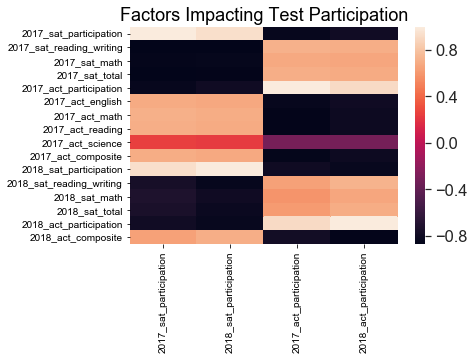

In [65]:
ax = plt.axes()
sns.set(font_scale=1.5)
sns.heatmap(final.corr()[['2017_sat_participation', '2018_sat_participation', '2017_act_participation', '2018_act_participation']])
ax.set_title('Factors Impacting Test Participation')
plt.show()

Of note: 2017 and 2018 ACT participation seem to be inversely correlated with 2017/2018 SAT participation (most states tend to favor one test over another.)

High rates of participation on either test seem to be inversely correlated with test score averages - ex. the higher the rate of participation on one test, the lower the average score on that test. 

In [66]:
# function to plot histograms
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10, 5))
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column]) 
    for i, title in enumerate(list_of_titles):
        ax[i].set_title(title)
    for i, xlabel in enumerate(list_of_xlabels):
        ax[i].set_xlabel(xlabel)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

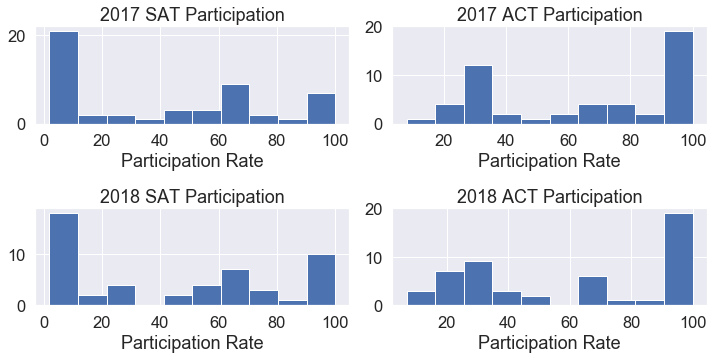

In [67]:
# Plotting SAT/ACT Participation Rates for 2017 and 2018
subplot_histograms(final, ['2017_sat_participation', '2017_act_participation', 
                           '2018_sat_participation', '2018_act_participation'], 
                   ['2017 SAT Participation', '2017 ACT Participation', 
                   '2018 SAT Participation', '2018 ACT Participation'], 
                   ['Participation Rate', 'Participation Rate', 
                   'Participation Rate', 'Participation Rate'])

SAT Participation: for both 2017 and 2018, there is a peak of high frequency around very low participation rates (0-10%), a smaller peak of high frequency in high participation rates (90-100%), and a cluster of participation rates peaking in the middle around 60-70%. in 2018, there were fewer states with very low participation rates and more states with very high participation rates.

ACT Participation: for both 2017 and 2018, there is a peak of high frequency around very high participation (90-100%) and a smaller peak of 30-40% participation with some states in between (with 60-80% participation).  

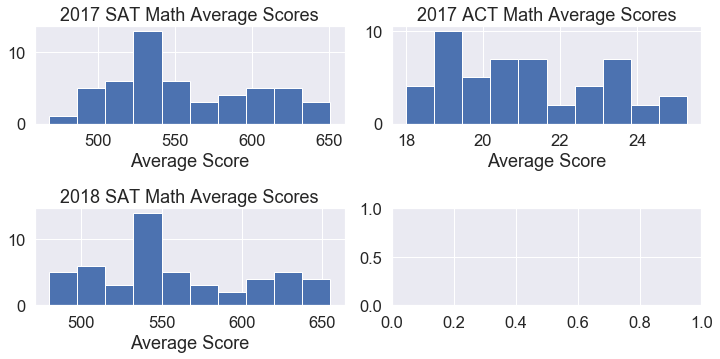

In [68]:
# Plotting Math Scores for SAT/ACT
subplot_histograms(final, ['2017_sat_math', '2017_act_math', 
                           '2018_sat_math'], 
                   ['2017 SAT Math Average Scores', '2017 ACT Math Average Scores', 
                   '2018 SAT Math Average Scores'], 
                   ['Average Score', 'Average Score', 
                   'Average Score'])

SAT Math scores in 2017 and 2018 saw a high peak of frequency around 525-550 points on average, with a fairly even distribution of scores between 500-650. This stayed about the same in 2018. 

ACT Math scores in 2017 were a little more evenly distributed than the SAT Math scores with a peak around 19 points and high frequencies around 20-22 and 23-24 points. 

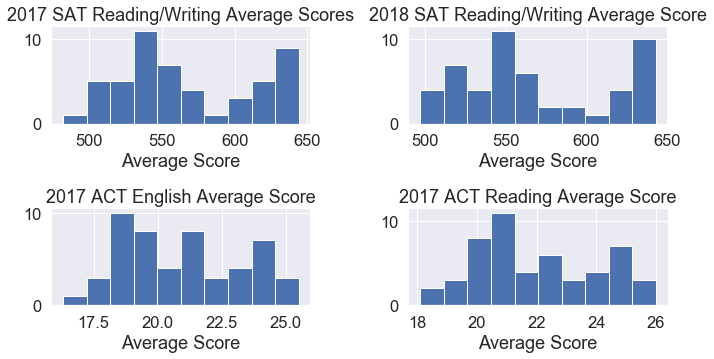

In [69]:
# Plotting Verbal Scores for SAT/ACT
subplot_histograms(final, ['2017_sat_reading_writing', '2018_sat_reading_writing', 
                           '2017_act_english', '2017_act_reading'], 
                   ['2017 SAT Reading/Writing Average Scores', 
                    '2018 SAT Reading/Writing Average Score', 
                   '2017 ACT English Average Score', '2017 ACT Reading Average Score'], 
                   ['Average Score', 'Average Score', 
                   'Average Score', 'Average Score'])

SAT Reading and Writing Scores in 2017 saw peaks of higher frequency around 535-550 and 630-650 (a cluster of states had high averages in the verbal section, the remaining states saw a cluster of averages around the lower scores of 530-550.) This stayed about the same in 2018 with a few more states seeing high performance on the reading/writing section.

ACT English and Reading scores are slightly more evenly distributed than the SAT scores with peaks of frequency around 18-19 points for English and 20-5-21.5 for Reading. 

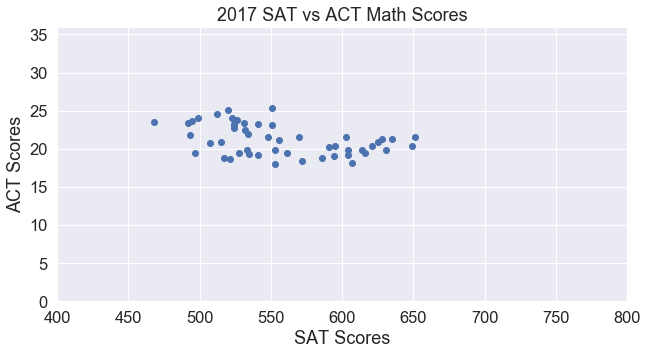

In [70]:
# SAT vs. ACT math scores for 2017

import matplotlib.pyplot as plt

plt.figure(figsize = (9,9))
sns.set(font_scale=1.5) 

ax1 = plt.subplot(211)
plt.ylim(0, 36)
plt.xlim(400, 800)
ax1.set_title('2017 SAT vs ACT Math Scores')
ax1.scatter(final['2017_sat_math'], final['2017_act_math'])
ax1.set(xlabel='SAT Scores', ylabel='ACT Scores')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

There doesn't appear to be a relationship between how well a state scored on the SAT Math vs. ACT Math sections in 2017.

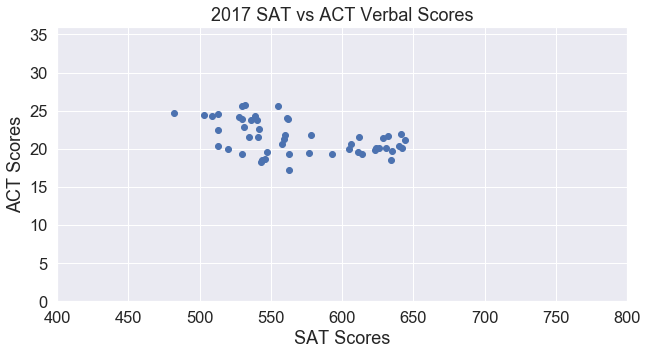

In [71]:
# SAT vs. ACT verbal scores for 2017
plt.figure(figsize = (9,9))
sns.set(font_scale=1.5) 

ax1 = plt.subplot(211)
plt.ylim(0, 36)
plt.xlim(400, 800)
ax1.set_title('2017 SAT vs ACT Verbal Scores')
ax1.scatter(final['2017_sat_reading_writing'], (final['2017_act_english'] + final['2017_act_reading'])/2)
ax1.set(xlabel='SAT Scores', ylabel='ACT Scores')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

There doesn't appear to be a relationship between how well a state scored on the SAT Verbal and ACT Verbal scores in 2017.

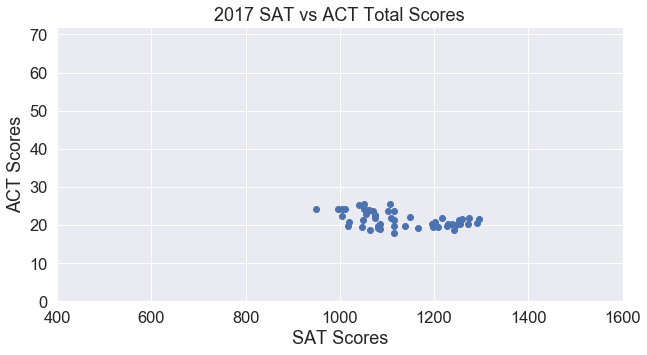

In [72]:
# SAT vs. ACT total scores for 2017
plt.figure(figsize = (9,9))
sns.set(font_scale=1.5) 

ax1 = plt.subplot(211)
plt.ylim(0, 72)
plt.xlim(400, 1600)
ax1.set_title('2017 SAT vs ACT Total Scores')
ax1.scatter(final['2017_sat_total'], final['2017_act_composite'])
ax1.set(xlabel='SAT Scores', ylabel='ACT Scores')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

There doesn't really appear to be a relationship between how well a state scored on the SAT and how well they scored on the ACT in 2017.

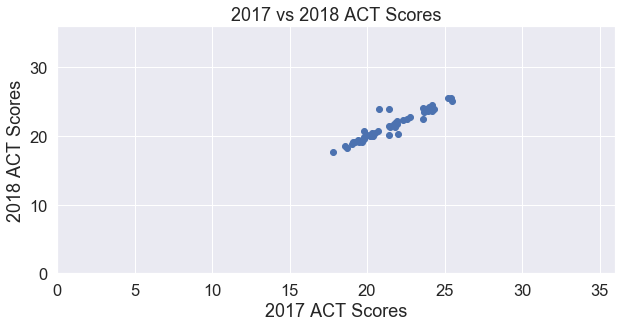

In [73]:
# ACT 2017 vs. 2018
plt.figure(figsize = (10,10))
sns.set(font_scale=1.5) 

ax1 = plt.subplot(211)
plt.ylim(0, 36)
plt.xlim(0, 36)
ax1.set_title('2017 vs 2018 ACT Scores')
ax1.scatter(final['2017_act_composite'], final['2018_act_composite'])
ax1.set(xlabel='2017 ACT Scores', ylabel='2018 ACT Scores');

It appears that states that scored higher on the ACT in 2017 also scored higher on the ACT in 2018.

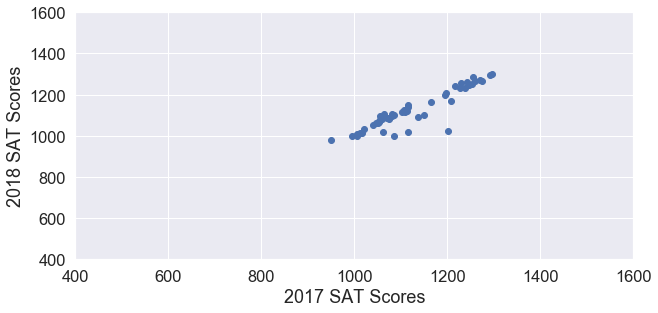

In [74]:
# SAT 2017 vs. 2018
plt.figure(figsize = (10,10))
sns.set(font_scale=1.5) 

ax2 = plt.subplot(211)
plt.ylim(400, 1600)
plt.xlim(400, 1600)
ax.set_title('2017 vs 2018 SAT Scores')
ax2.scatter(final['2017_sat_total'], final['2018_sat_total'])
ax2.set(xlabel='2017 SAT Scores', ylabel='2018 SAT Scores');

It appears that states with higher SAT scores in 2017 tended to have higher SAT scores in 2018.

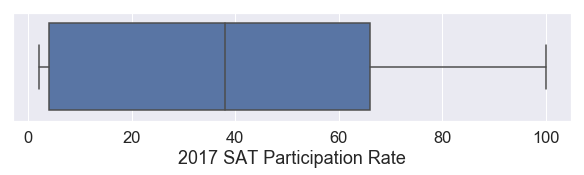

In [75]:
# 2017 SAT Participation
plt.figure(figsize = (10,2))
ax1 = sns.boxplot(x=final['2017_sat_participation'])
ax1.set(xlabel='2017 SAT Participation Rate');

2017 SAT Participation rates are right-skewed with an average of 39.8%, median of 38%. Participation rates ranged from 2% to 100% with half of all participation rates falling within 4-66%. 

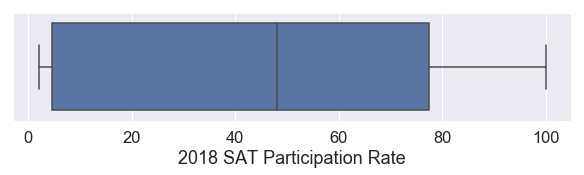

In [76]:
# 2018 SAT Participation
plt.figure(figsize = (10,2))
ax1 = sns.boxplot(x=final['2018_sat_participation'])
ax1.set(xlabel="2018 SAT Participation Rate");

2018 SAT Participation rates are right-skewed with an average of 45% (up 5% from 2017) and a median of 48% (up 10%). Participation rates ranged from 2-100% with half of all participation rates falling between 4.5-77.5%. 

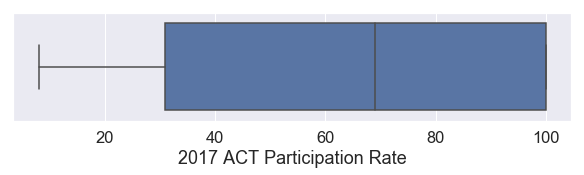

In [77]:
# 2017 ACT Participation
plt.figure(figsize = (10,2))
ax1 = sns.boxplot(x=final['2017_act_participation'])
ax1.set(xlabel="2017 ACT Participation Rate");

2017 ACT Participation rates are left-skewed with an average of 65% and median of 69%. Participation rates ranged from 8-100% with half of all participation rates falling within 31-100%.

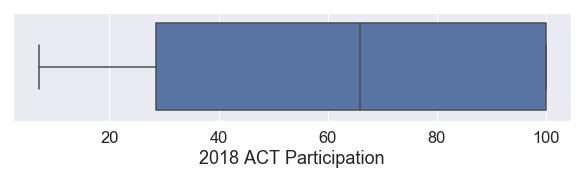

In [78]:
# 2018 ACT Participation
plt.figure(figsize = (10,2))
ax1 = sns.boxplot(x=final['2018_act_participation'])
ax1.set(xlabel="2018 ACT Participation");

2018 ACT Participation rates are left-skewed with an average of 61.7% (down 3.3% from 2017) and a median of 66% (down 3% from 2017). Participation rates ranged from 7-100% with half of all participation rates falling between 28.5-100%.

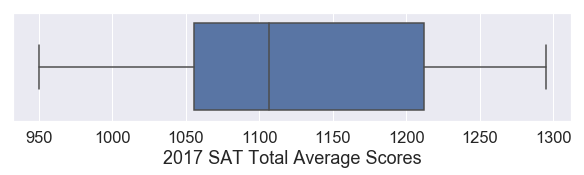

In [79]:
# 2017 SAT Total
 
plt.figure(figsize = (10,2))
ax1 = sns.boxplot(x=final['2017_sat_total'])
ax1.set(xlabel="2017 SAT Total Average Scores");

2017 SAT total scores are right-skewed with an average of 1126 and a median of 1107. Scores ranged from 950-1295 with half of total scores falling between 1055-1212 points.

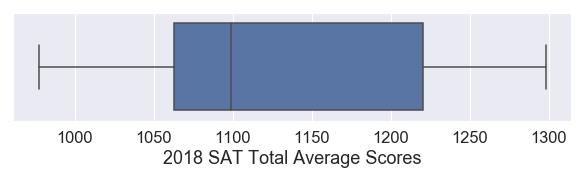

In [80]:
# 2018 SAT Total
 
plt.figure(figsize = (10,2))
ax1 = sns.boxplot(x=final['2018_sat_total'])
ax1.set(xlabel="2018 SAT Total Average Scores");

2018 SAT Scores are right-skewed with a mean of 1126 (same as 2017) and a median of 1099 (little below 2017.) Average total scores range between 977-1298 points with half of scores falling between 1063-1220 points.  

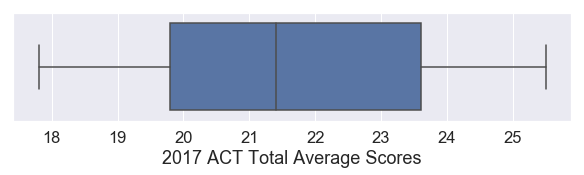

In [81]:
# 2017 ACT Total
 
plt.figure(figsize = (10,2))
ax1 = sns.boxplot(x=final['2017_act_composite'])
ax1.set(xlabel="2017 ACT Total Average Scores");

2017 ACT Composite score averages are slightly right-skewed with an average of 21.5 and a median of 21.4 points. Average composite scores ranged from 17.8-25.5 points with half of averages falling between 19.8-23.6 points. 

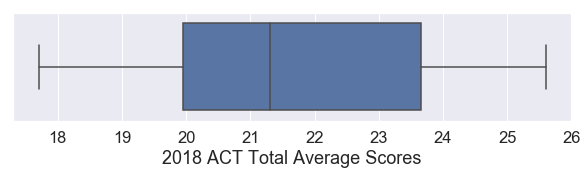

In [82]:
# 2018 ACT Total
 
plt.figure(figsize = (10,2))
ax1 = sns.boxplot(x=final['2018_act_composite'])
ax1.set(xlabel="2018 ACT Total Average Scores");

2018 ACT Composite scores are right-skewed with an average of 21.49 (about same as 2017) and median of 21.3 points (just under 2017). Average ACT composite scores range from 17.7-25.6 points with half of all averages falling between 19.95-23.65.

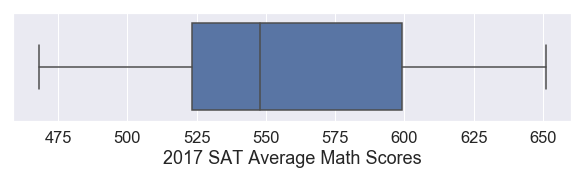

In [83]:
# 2017 SAT Math
 
plt.figure(figsize = (10,2))
ax1 = sns.boxplot(x=final['2017_sat_math'])
ax1.set(xlabel="2017 SAT Average Math Scores");

Average 2017 SAT Math scores were right-skewed with an average of 556.9 and median of 548 points. Average math scores ranged from 468-651 points with half of all scores falling between 523-599 points. 

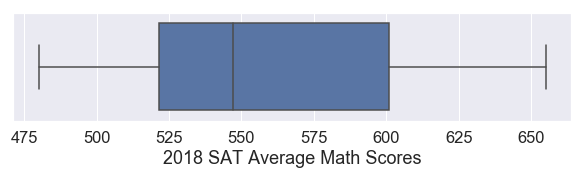

In [84]:
# 2018 SAT Math
 
plt.figure(figsize = (10,2))
ax1 = sns.boxplot(x=final['2018_sat_math'])
ax1.set(xlabel="2018 SAT Average Math Scores");

Average 2018 SAT Math scores are right-skewed with an average of 556.9 and median of 548 points (same as 2017.) Average math scores ranged from 480-655 (slightly better than 2017) with half of all averages falling between 521.5-601 points.

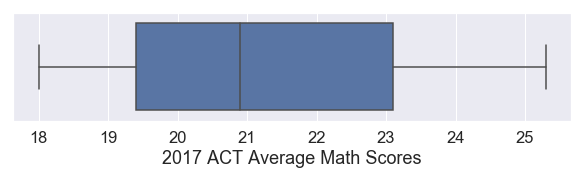

In [85]:
# 2017 ACT Math
 
plt.figure(figsize = (10,2))
ax1 = sns.boxplot(x=final['2017_act_math'])
ax1.set(xlabel="2017 ACT Average Math Scores");

Average 2017 ACT Math scores were right-skewed with an average of 21.2 and median of 20.9 points. Average scores ranged from 18-25.3 points with half of average scores falling between 19.4-23.1 points.

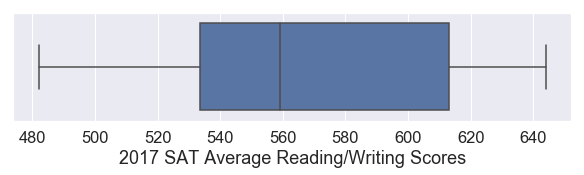

In [86]:
# 2017 SAT Reading/Writing
 
plt.figure(figsize = (10,2))
ax1 = sns.boxplot(x=final['2017_sat_reading_writing'])
ax1.set(xlabel="2017 SAT Average Reading/Writing Scores");

Average 2017 SAT Reading and Writing scores were right-skewed with an average of 569 and median of 559 points. Average scores fell between 482-644 points with half of average scores falling between 533-613 points.

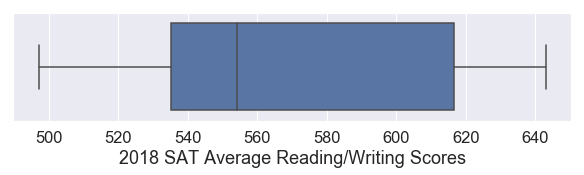

In [87]:
# 2018 SAT Reading/Writing
 
plt.figure(figsize = (10,2))
ax1 = sns.boxplot(x=final['2018_sat_reading_writing'])
ax1.set(xlabel="2018 SAT Average Reading/Writing Scores");

Average 2018 SAT/Reading and Writing scores were right-skewed with an average of 576.7 and median of 554 points (down slightly from 2017). Average scores ranged from 497-643 points with half of all averages falling between 535-616.6 points.

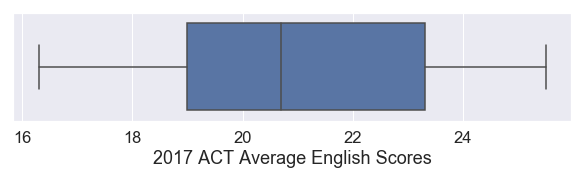

In [88]:
# 2017 ACT English
 
plt.figure(figsize = (10,2))
ax1 = sns.boxplot(x=final['2017_act_english'])
ax1.set(xlabel="2017 ACT Average English Scores");

Average 2017 ACT English scores were slightly right-skewed with an average of 20.9 and median of 20.7 points. Average scores ranged from 16.3-25.5 points with half of all average scores falling between 19-23.3 points. 

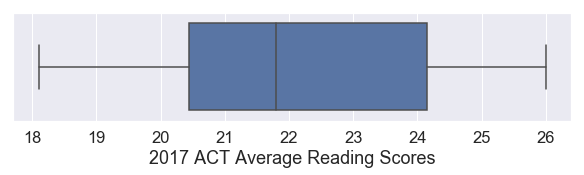

In [89]:
# 2017 ACT Reading
 
plt.figure(figsize = (10,2))
ax1 = sns.boxplot(x=final['2017_act_reading'])
ax1.set(xlabel="2017 ACT Average Reading Scores");

Average 2017 ACT Reading scores were centered around an average of 22 and median of 21.8 points. Average scores ranged from 18.1-26 points with half of scores falling between 20.45-24.15 points.

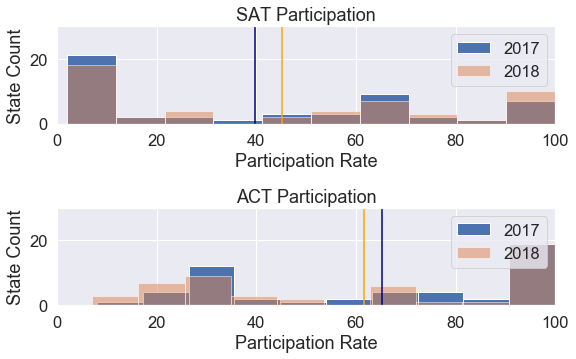

In [90]:
# 2017/2018 SAT vs ACT participation
plt.figure(figsize = (8, 5))
ax1 = plt.subplot(211)
plt.xlim(0, 100)
plt.ylim(0, 30)
ax1.set_title('SAT Participation')
ax1.hist(final['2017_sat_participation'], alpha=1, label = '2017')
ax1.hist(final['2018_sat_participation'], alpha=0.5, label = '2018')
ax1.set(xlabel='Participation Rate', ylabel='State Count')
ax1.vlines(x = 39.8, # average rate in 2017
           ymin = 0,
           ymax = 30, 
           color = 'navy')
ax1.vlines(x = 45.2, # average rate in 2018
           ymin = 0,
           ymax = 30, 
           color = 'orange')
plt.legend(loc = 'upper right');

# 2017 ACT participation (hist) against 2018 SAT Part (line)
ax2 = plt.subplot(212)
plt.xlim(0, 100)
plt.ylim(0, 30)
ax2.set_title('ACT Participation')
ax2.hist(final['2017_act_participation'], alpha=1, label = '2017')
ax2.hist(final['2018_act_participation'], alpha=0.5, label = '2018')
ax2.set(xlabel='Participation Rate', ylabel='State Count')
ax2.vlines(x = 65.25,
           ymin = 0,
           ymax = 30,
           color = 'navy')
ax2.vlines(x = 61.7,
           ymin = 0,
           ymax = 30,
           color = 'orange')
plt.legend(loc = 'upper right');

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

These graphs don't tell us much about participation rate changes from 2017-2018: it looks like there was a high proportion of states with 100% ACT participation in 2017 that remained about the same in 2018, and a similarly sized group of states with low participation on the SAT in 2017/2018. The average of average participation rates for the SAT saw a small increase in 2018; the ACT saw a small decrease.

In [91]:
# states with 100% SAT participation in 2017
final[(final['2017_sat_participation'] == 100)]['state']

6              Connecticut
7                 Delaware
8     District of Columbia
22                Michigan
Name: state, dtype: object

In [92]:
# states with 100% SAT Participation in 2018
final[(final['2018_sat_participation'] == 100)]['state']

6     Connecticut
7        Delaware
12          Idaho
22       Michigan
Name: state, dtype: object

In [93]:
# states with 100% ACT Participation in 2017
final[(final['2017_act_participation'] == 100)]['state']

0            Alabama
3           Arkansas
5           Colorado
17          Kentucky
18         Louisiana
23         Minnesota
24       Mississippi
25          Missouri
26           Montana
28            Nevada
33    North Carolina
36          Oklahoma
40    South Carolina
42         Tennessee
44              Utah
49         Wisconsin
50           Wyoming
Name: state, dtype: object

In [94]:
# states with 100% ACT Participation in 2018
final[(final['2018_act_participation'] == 100)].head()

,state,2017_sat_participation,2017_sat_reading_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,6,595,571,1166,100,19.1
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4,5,592,576,1168,100,19.4
17,Kentucky,4,631,616,1247,100,19.6,19.4,20.5,20.1,20.0,4,630,618,1248,100,20.2
18,Louisiana,4,611,586,1198,100,19.4,18.8,19.8,19.6,19.5,4,615,595,1210,100,19.2
24,Mississippi,2,634,607,1242,100,18.2,18.1,18.8,18.8,18.6,4,633,629,1262,100,18.6


In [108]:
# Sorting before running graph
final = final.sort_values(by="2018_sat_total", ascending=False)

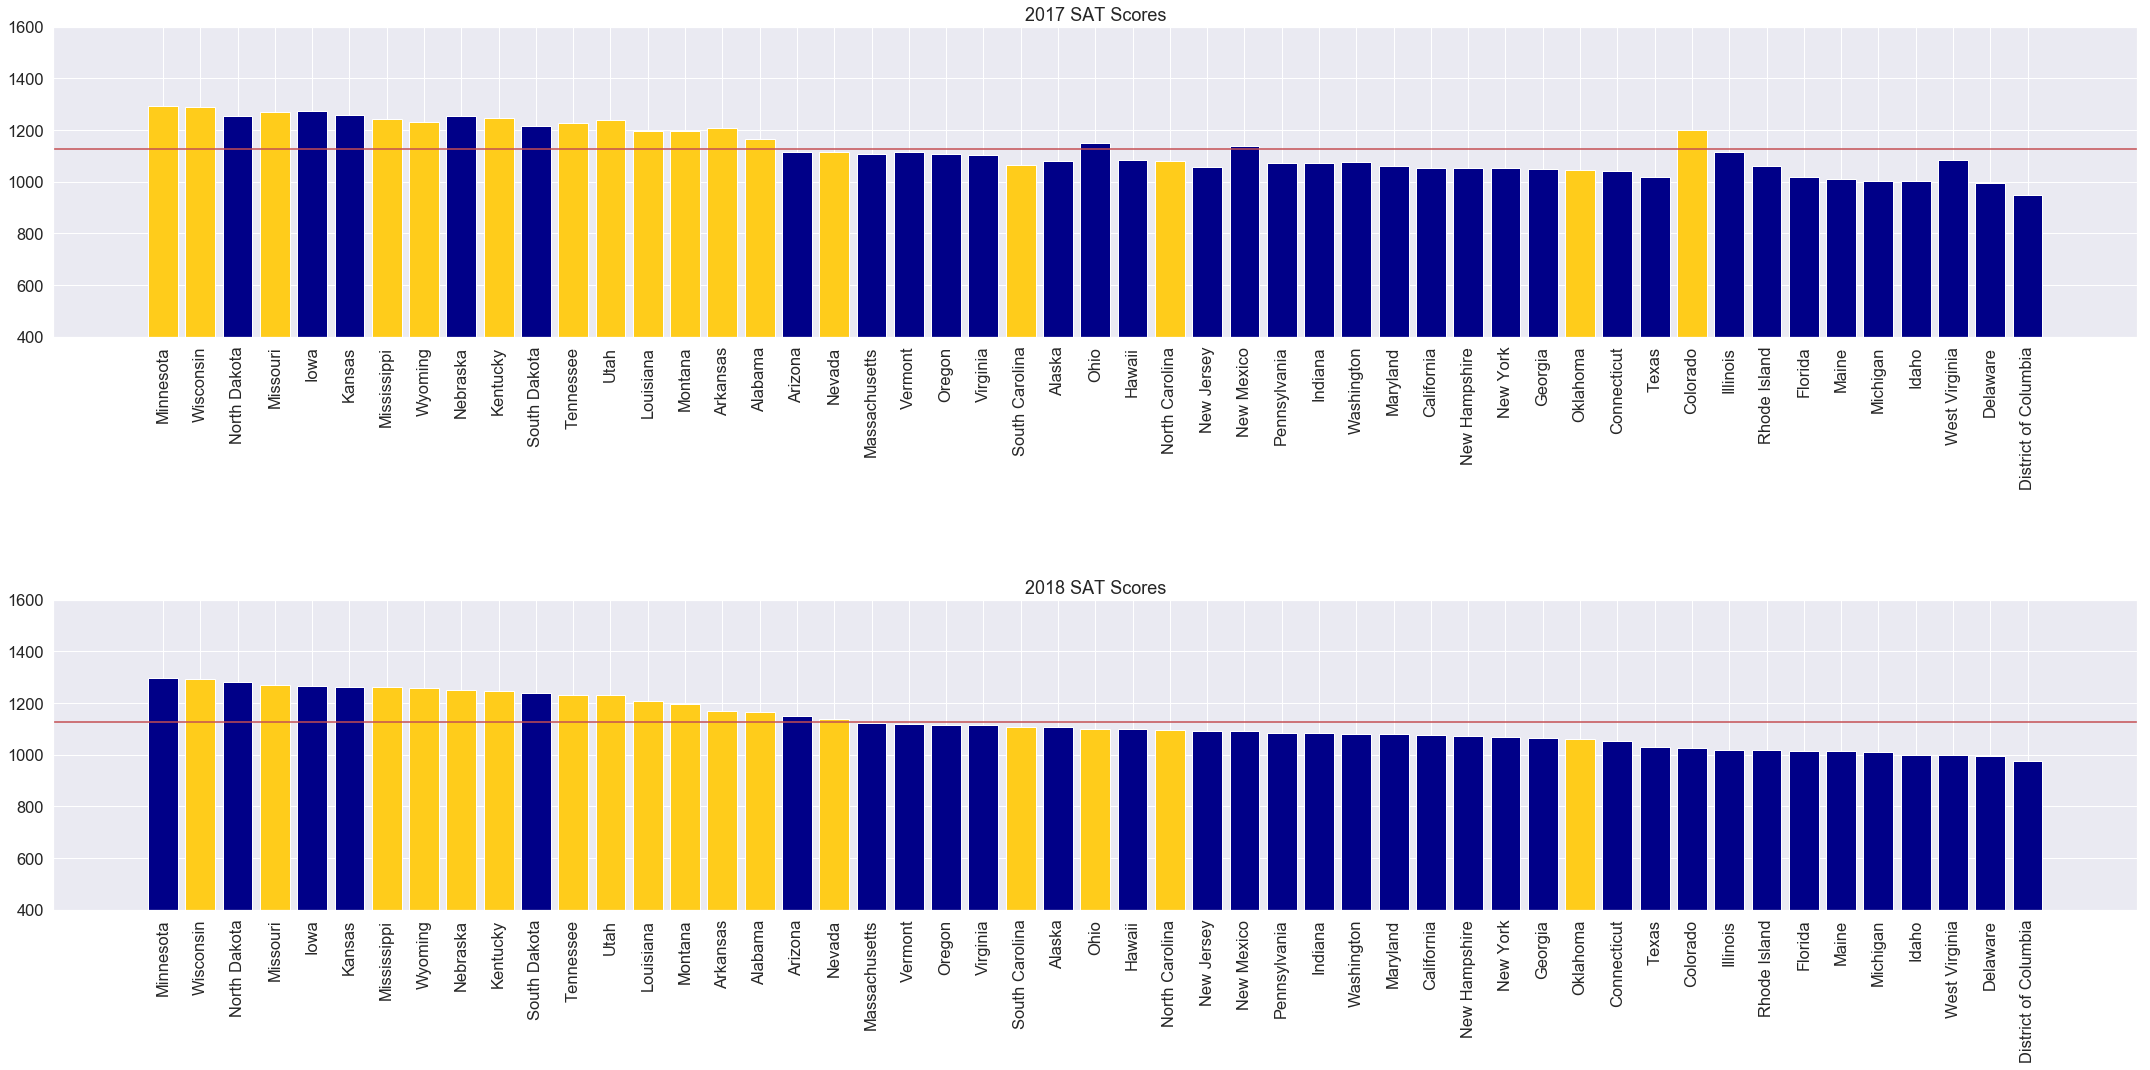

In [109]:
# Graphing ranks of state SAT Scores for 2017, 2018
## borrowed color-coding code from https://preinventedwheel.com/easy-matplotlib-bar-chart/
plt.figure(figsize = (30, 15))
plt.rcParams.update({'font.size': 30})

states_100_act_2017 = ['Minnesota', 'Colorado', 'Wisconsin', 'Missouri', 'Utah', 'Montana',
                       'Wyoming', 'Kentucky', 'Tennessee', 'Louisiana', 'Oklahoma', 'Arkansas',
                       'Alabama', 'North Carolina', 'South Carolina', 'Mississippi', 'Nevada']

states_100_act_2018 = ['Ohio', 'Nebraska', 'Wisconsin', 'Missouri', 'Utah', 'Montana', 
                       'Wyoming', 'Kentucky', 'Tennessee', 'Louisiana', 'Oklahoma', 'Arkansas',
                       'Alabama', 'North Carolina', 'South Carolina', 'Mississippi', 'Nevada']

ax1 = plt.subplot(211)
ax1.bar(x=(final['state']), height=final['2017_sat_total'], 
       color=['#FFCC1B' if row.state in states_100_act_2017 else '#000088' 
              for name,row in final.iterrows()])
ax1.set_title("2017 SAT Scores")
ax1.axhline(y=1126, xmin=0, xmax=51, color='r')
plt.xticks(rotation=90)
plt.ylim(400, 1600)


ax2 = plt.subplot(212)
ax2.bar(x=(final['state']), height=final['2018_sat_total'], 
       color=['#FFCC1B' if row.state in states_100_act_2018 else '#000088' 
              for name,row in final.iterrows()])
ax2.set_title("2018 SAT Scores")
ax2.axhline(y=1126, xmin=0, xmax=51, color='r')
plt.xticks(rotation=90)
plt.ylim(400, 1600)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)

I wanted to look at the 17 states that had 100% ACT participation in 2017. Both graphs show states ranked from top performers on the SAT on the left to worst performers on the SAT on the right. The states with 100% ACT Participation both years are highlighted in yellow. With the exception of North Carolina, South Caroline, and Oklahoma, these states aree in the top 50% of states performing on the SAT (not the ACT.) 

In [110]:
# Sorting for ACT graphs
final = final.sort_values(by="2018_act_composite", ascending=False)

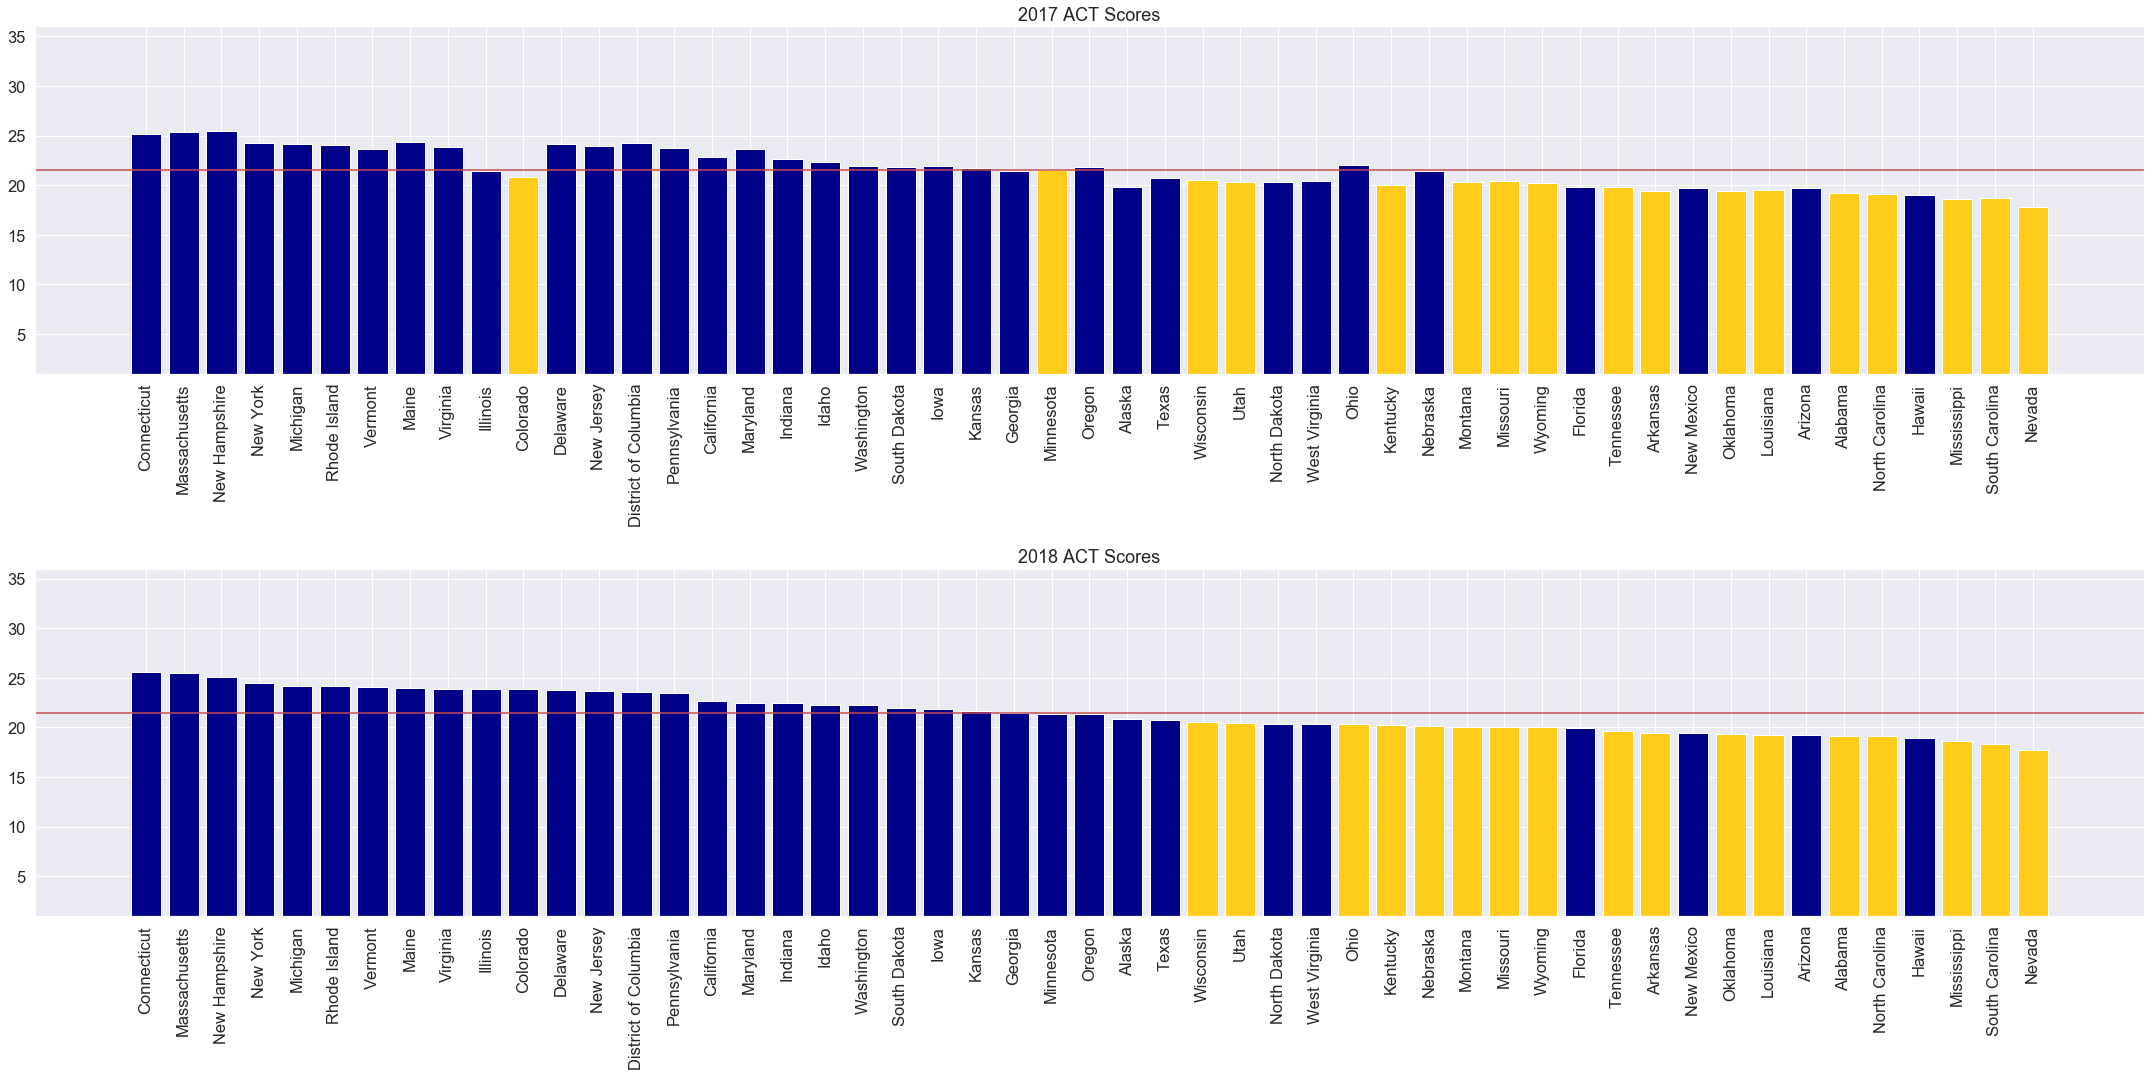

In [111]:
# Graphing SAT rankings of states from highest to lowest performers
## borrowed color-coding code from https://preinventedwheel.com/easy-matplotlib-bar-chart/

plt.figure(figsize = (30, 15))
plt.rcParams.update({'font.size': 22})

states_100_act_2017 = ['Minnesota', 'Colorado', 'Wisconsin', 'Missouri', 'Utah', 'Montana',
                       'Wyoming', 'Kentucky', 'Tennessee', 'Louisiana', 'Oklahoma', 'Arkansas',
                       'Alabama', 'North Carolina', 'South Carolina', 'Mississippi', 'Nevada']

states_100_act_2018 = ['Ohio', 'Nebraska', 'Wisconsin', 'Missouri', 'Utah', 'Montana', 
                       'Wyoming', 'Kentucky', 'Tennessee', 'Louisiana', 'Oklahoma', 'Arkansas',
                       'Alabama', 'North Carolina', 'South Carolina', 'Mississippi', 'Nevada']

ax1 = plt.subplot(211)
ax1.bar(x=(final['state']), height=final['2017_act_composite'], 
        color=['#FFCC1B' if row.state in states_100_act_2017 else '#000088' for name,row in final.iterrows()])
ax1.set_title("2017 ACT Scores")
ax1.axhline(y=21.51, xmin=0, xmax=51, color='r')
plt.xticks(rotation=90)
plt.ylim(1, 36)

ax2 = plt.subplot(212)
ax2.bar(x=(final['state']), height=final['2018_act_composite'],
       color=['#FFCC1B' if row.state in states_100_act_2018 else '#000088' for name,row in final.iterrows()])
ax2.set_title("2018 ACT Scores")
ax2.axhline(y=21.49, xmin=0, xmax=51, color='r')
plt.xticks(rotation=90)
plt.ylim(1, 36)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

I wanted to graph the same 17 states (16 in 2018) with 100% ACT participation on a graph ranking the top performers on the ACT for both years. In both 2017 and 2018, the states with 100% participation on the ACT were in the bottom 50% of states scoring on the ACT. There seems to be an inverse relationship between how well they performed on the SAT and ACT compared to other states. This supports the correlation between high participation rates and low average scores on a test.

In [112]:
# Sorting for ACT graphs
final = final.sort_values(by="2018_act_composite", ascending=False)

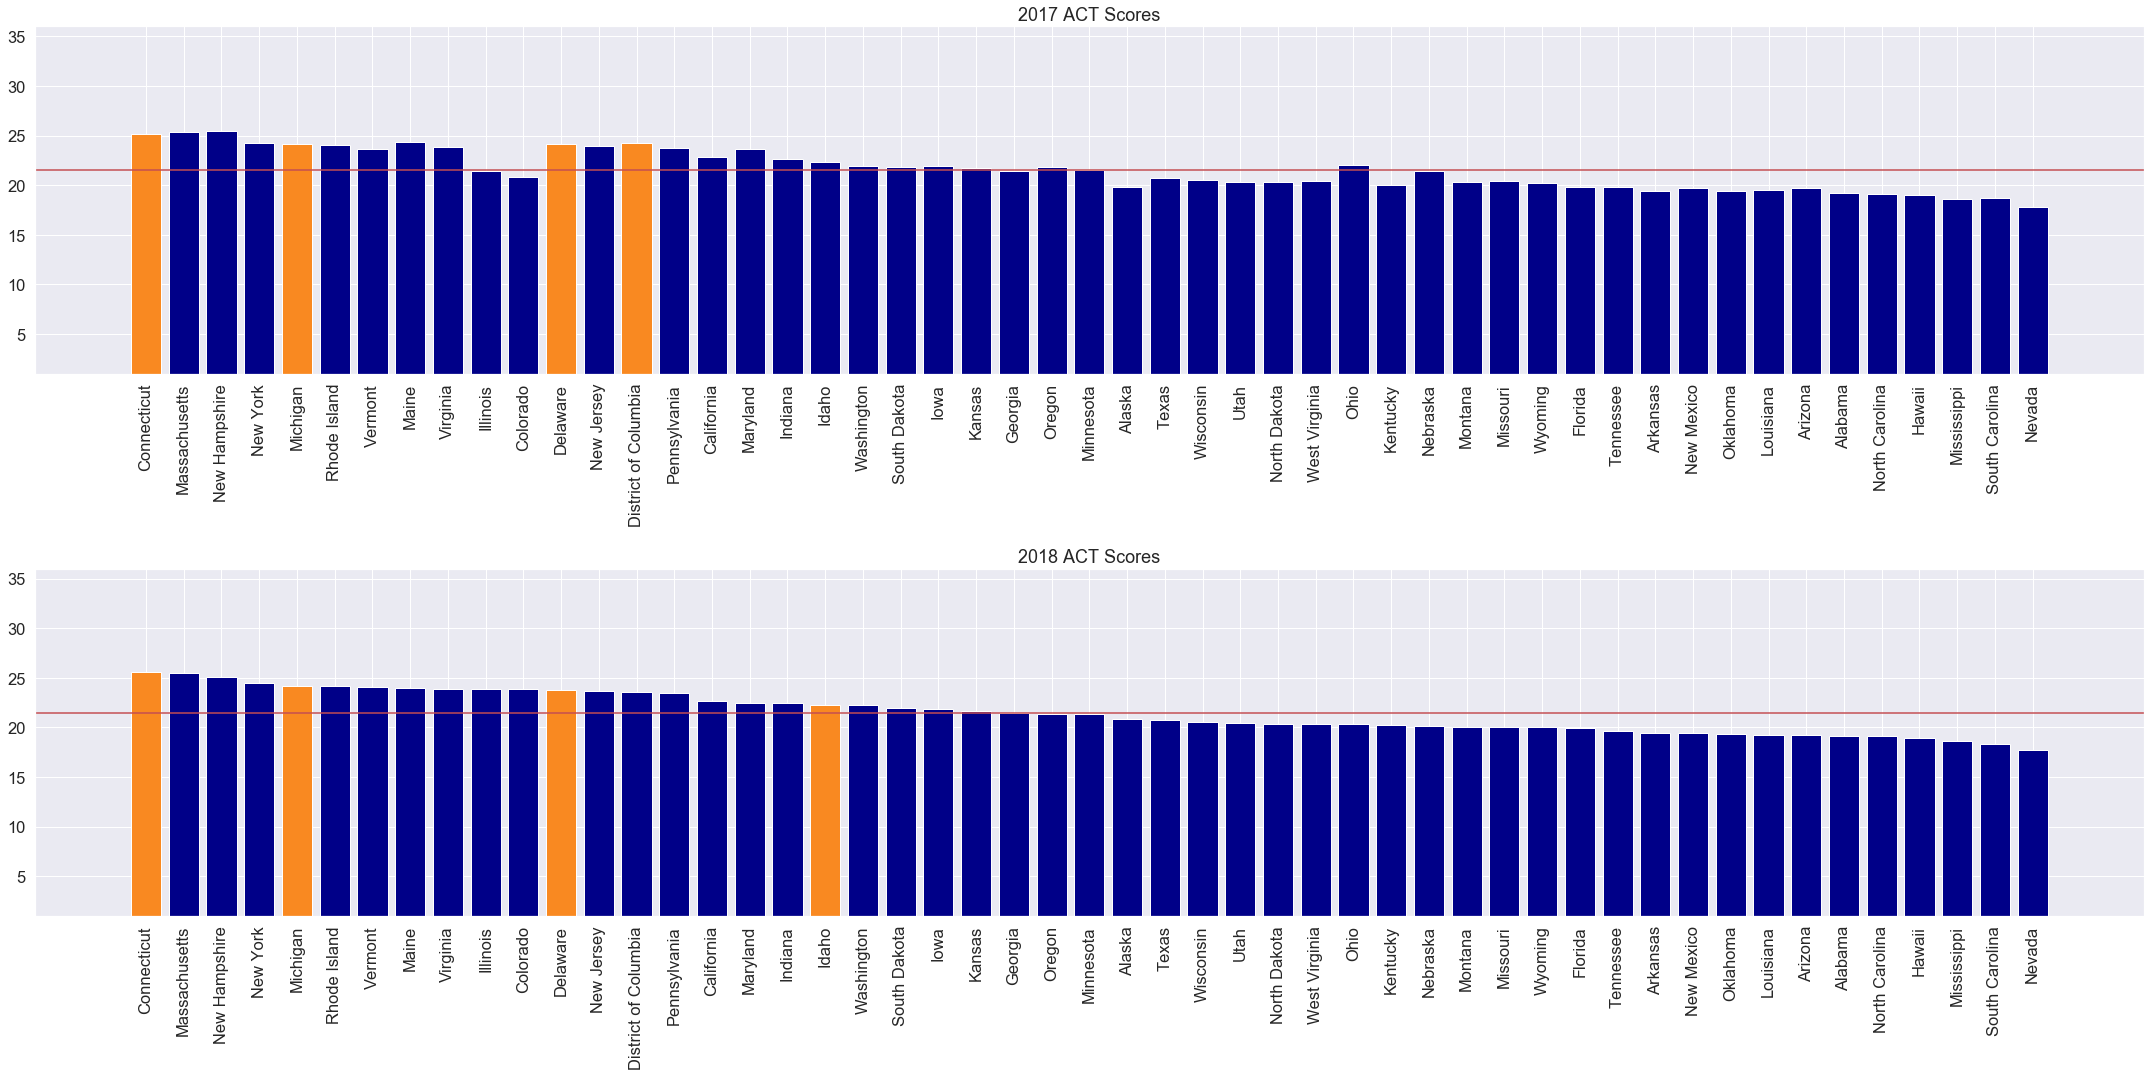

In [113]:
# Graphing ACT rankings of states from highest to lowest performers, SAT 100%
## borrowed color-coding code from https://preinventedwheel.com/easy-matplotlib-bar-chart/

plt.figure(figsize = (30, 15))
plt.rcParams.update({'font.size': 22})

states_100_sat_2017 = ['Connecticut', 'District of Columbia', 'Delaware', 'Michigan']

states_100_sat_2018 = ['Connecticut', 'Delaware', 'Michigan', 'Idaho']

ax1 = plt.subplot(211)
ax1.bar(x=(final['state']), height=final['2017_act_composite'], 
        color=['#F98921' if row.state in states_100_sat_2017 else '#000088' for name,row in final.iterrows()])
ax1.set_title("2017 ACT Scores")
ax1.axhline(y=21.51, xmin=0, xmax=51, color='r')
plt.xticks(rotation=90)
plt.ylim(1, 36)

ax2 = plt.subplot(212)
ax2.bar(x=(final['state']), height=final['2018_act_composite'],
       color=['#F98921' if row.state in states_100_sat_2018 else '#000088' for name,row in final.iterrows()])
ax2.set_title("2018 ACT Scores")
ax2.axhline(y=21.49, xmin=0, xmax=51, color='r')
plt.xticks(rotation=90)
plt.ylim(1, 36)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

It looks like the same relationship between national rank and mandatory testing might exist for the SAT too...

In [114]:
# Sorting for ACT graphs
final = final.sort_values(by="2018_sat_total", ascending=False)

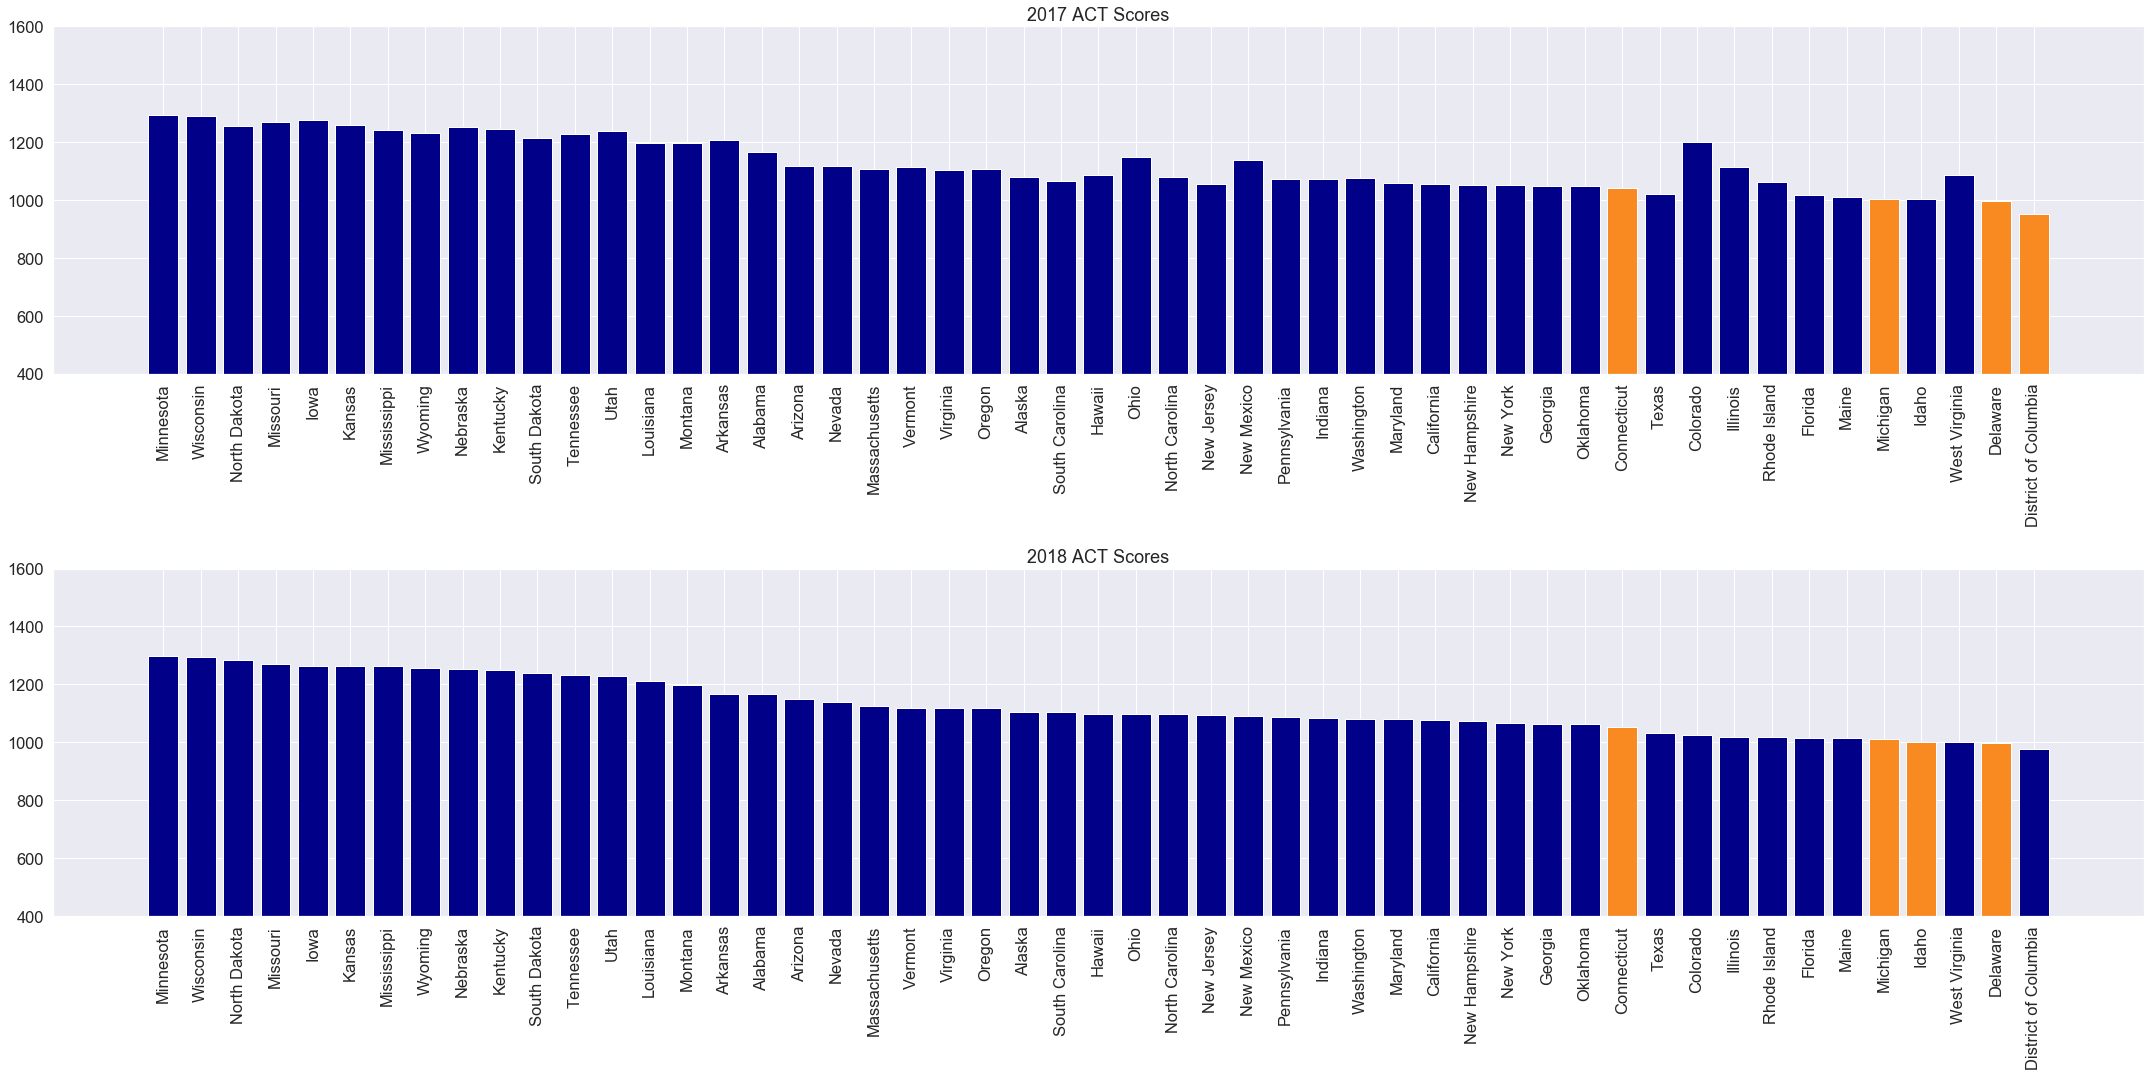

In [115]:
# Graphing SAT rankings of states from highest to lowest performers, SAT 100%
## borrowed color-coding code from https://preinventedwheel.com/easy-matplotlib-bar-chart/

plt.figure(figsize = (30, 15))
plt.rcParams.update({'font.size': 22})

states_100_sat_2017 = ['Connecticut', 'District of Columbia', 'Delaware', 'Michigan']

states_100_sat_2018 = ['Connecticut', 'Delaware', 'Michigan', 'Idaho']

ax1 = plt.subplot(211)
ax1.bar(x=(final['state']), height=final['2017_sat_total'], 
        color=['#F98921' if row.state in states_100_sat_2017 else '#000088' for name,row in final.iterrows()])
ax1.set_title("2017 ACT Scores")
ax1.axhline(y=21.51, xmin=0, xmax=51, color='r')
plt.xticks(rotation=90)
plt.ylim(400, 1600)

ax2 = plt.subplot(212)
ax2.bar(x=(final['state']), height=final['2018_sat_total'],
       color=['#F98921' if row.state in states_100_sat_2018 else '#000088' for name,row in final.iterrows()])
ax2.set_title("2018 ACT Scores")
ax2.axhline(y=21.49, xmin=0, xmax=51, color='r')
plt.xticks(rotation=90)
plt.ylim(400, 1600)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

In [103]:
# states with 100% ACT Participation in 2017, looking at SAT participation
final[(final['2017_act_participation'] == 100)]['state']

23         Minnesota
49         Wisconsin
25          Missouri
17          Kentucky
24       Mississippi
44              Utah
50           Wyoming
42         Tennessee
3           Arkansas
5           Colorado
18         Louisiana
26           Montana
0            Alabama
28            Nevada
33    North Carolina
40    South Carolina
36          Oklahoma
Name: state, dtype: object

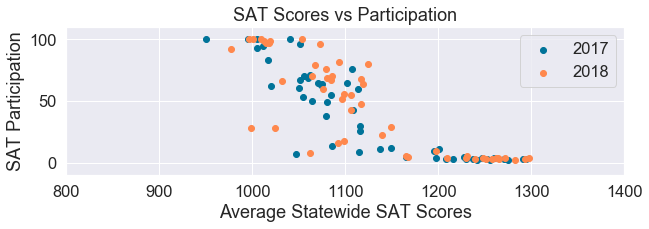

In [104]:
# Plotting SAT scores vs SAT Participation, 2017 and 2018
plt.figure(figsize = (10,6))
sns.set(font_scale=1.5) 

ax1= plt.subplot(211)
plt.ylim(-10, 110)
plt.xlim(800, 1400)
ax1.set_title('SAT Scores vs Participation')
ax1.scatter(final['2017_sat_total'], final['2017_sat_participation'], color ='#007399', label='2017')
ax1.scatter(final['2018_sat_total'], final['2018_sat_participation'], color ='#ff884d', label='2018')
ax1.set(xlabel='Average Statewide SAT Scores', ylabel='SAT Participation')
plt.legend(loc = 'upper right');

I wanted to see if there was a relationship between participation rates and average state scores for the SAT in 2017 and 2018. In both years, it appears there was a negative correlation between the two variables (meaning the higher the participation rate, the lower the average score.)

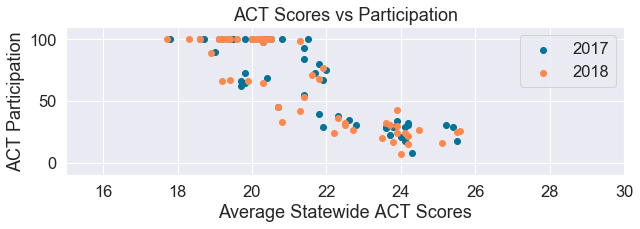

In [105]:
## ACT Scores vs Participation

plt.figure(figsize = (10,6))
sns.set(font_scale=1.5) 

ax1= plt.subplot(211)
plt.ylim(-10, 110)
plt.xlim(15, 30)
ax1.set_title('ACT Scores vs Participation')
ax1.scatter(final['2017_act_composite'], final['2017_act_participation'], color ='#007399', label='2017')
ax1.scatter(final['2018_act_composite'], final['2018_act_participation'], color ='#ff884d', label='2018')
ax1.set(xlabel='Average Statewide ACT Scores', ylabel='ACT Participation')
plt.legend(loc = 'upper right');

## Analyzing Descriptive and Inferential Statistics

In [106]:
final.describe()

,2017_sat_participation,2017_sat_reading_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_reading_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608,45.235294,567.705882,558.450980,1126.156863,61.725490,21.496078
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,37.300718,45.311056,49.464862,94.444136,34.037085,2.111583
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,2.000000,497.000000,480.000000,977.000000,7.000000,17.700000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,4.500000,535.000000,521.500000,1063.000000,28.500000,19.950000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,48.000000,554.000000,547.000000,1099.000000,66.000000,21.300000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,77.500000,616.500000,601.000000,1220.000000,100.000000,23.650000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000


2017 SAT Participation rates are right-skewed with an average of 39.8%, median of 38%. Participation rates ranged from 2% to 100% with half of all participation rates falling within 4-66%.
2018 SAT Participation rates are right-skewed with an average of 45% (up 5% from 2017) and a median of 48% (up 10%). Participation rates ranged from 2-100% with half of all participation rates falling between 4.5-77.5%.

2017 ACT Participation: is right skewed with an average of 65% and median of 69%. Participation rates ranged from 8-100% with half of all participation rates falling within 31-100%. 
2018 ACT Participation rates are left-skewed with an average of 61.7% (down 3.3% from 2017) and a median of 66% (down 3% from 2017). Participation rates ranged from 7-100% with half of all participation rates falling between 28.5-100%.

Summary: SAT average participation rates saw an increase in 2018, ACT average participation rates saw a decline.
***
Average 2017 SAT Reading and Writing scores were right-skewed with an average of 569 and median of 559 points. Average scores fell between 482-644 points with half of average scores falling between 533-613 points.
Average 2018 SAT/Reading and Writing scores were right-skewed with an average of 576.7 and median of 554 points (down slightly from 2017). Average scores ranged from 497-643 points with half of all averages falling between 535-616.6 points.

Average 2017 ACT English scores were slightly right-skewed with an average of 20.9 and median of 20.7 points. Average scores ranged from 16.3-25.5 points with half of all average scores falling between 19-23.3 points.
Average 2017 ACT Reading scores were centered around an average of 22 and median of 21.8 points. Average scores ranged from 18.1-26 points with half of scores falling between 20.45-24.15 points.

Summary: Can't compare trends in 2017 and 2018 verbal scores between the two tests because we only have data for the SAT both years. SAT Reading/Writing average scores saw a very slight decline in 2018.
***
Average 2017 SAT Math scores were right-skewed with an average of 556.9 and median of 548 points. Average math scores ranged from 468-651 points with half of all scores falling between 523-599 points.
Average 2018 SAT Math scores are right-skewed with an average of 556.9 and median of 548 points (same as 2017.) Average math scores ranged from 480-655 (slightly better than 2017) with half of all averages falling between 521.5-601 points.

Average 2017 ACT Math scores were right-skewed with an average of 21.2 and median of 20.9 points. Average scores ranged from 18-25.3 points with half of average scores falling between 19.4-23.1 points.

Summary: Can't compare trends in 2017 and 2018 math scores between the two tests because we only have data for the SAT both years. Average SAT Math scores seemed to improve very slightly in 2018. 
***
2017 SAT total scores are right-skewed with an average of 1126 and a median of 1107. Scores ranged from 950-1295 with half of total scores falling between 1055-1212 points.
2018 SAT Scores are right-skewed with a mean of 1126 (same as 2017) and a median of 1099 (little below 2017.) Average total scores range between 977-1298 points with half of scores falling between 1063-1220 points.

2017 ACT Composite score averages are slightly right-skewed with an average of 21.5 and a median of 21.4 points. Average composite scores ranged from 17.8-25.5 points with half of averages falling between 19.8-23.6 points.
2018 ACT Composite scores are right-skewed with an average of 21.49 (about same as 2017) and median of 21.3 points (just under 2017). Average ACT composite scores range from 17.7-25.6 points with half of all averages falling between 19.95-23.65.

Summary: Average SAT Total Scores stayed about the same in 2018 as they were in 2017; average ACT composite scores also stayed about the same (very slight decline).
****
**Data Distribution:** Because we only have 51 pieces of data for each year, for each aspect of the tests we are measuring, it is unlikely we will see a normal distribution. If we had data on a more granular level (ex. district-wide instead of state-wide) we could expect to see a more normal distribution as sample size increases. Because we don't have much data, our estimates on future trends and relationships between variables are very rough. It's likely we will need more outside research to explain what relationships exist between these variables and make a recommendation to the College Board.

**Limitations of the Data:** It would be difficult to make any conclusions about trends in the data and potential causes by just looking at the data alone. We only have averages and participation rates as percentages at the statewide level, which doesn't factor in the differences in population size among the states. With only two years' worth of data, we don't have enough information to fully understand how each state's performance on both tests may have evolved over time; it's likely some of these states have long held a preference for one test over another in terms of participation but we can't tell that from 2 years of data either.

## Outside Research
I conducted further research on three states to get a better understanding of what factors outside the data might be driving SAT/ACT participation.

**Oklahoma** is interesting because they have 100% ACT participation but rank poorly on both the SAT and ACT. In 2017, Oklahoma extended a pilot program rolled out in 2015-2016 that covered the cost of the SAT/ACT for all high school juniors. This policy change was seen as a way to break down the barriers to postsecondary education for Oklahoma's students. According to the Oklahoma State DOE, most districts voted for the ACT given a historical preference of Oklahoma students for the ACT. (Source: https://sde.ok.gov/newsblog/2017-01-10/oklahoma-public-high-school-juniors-can-take-act-or-sat-free-under-state)

**DC** is interesting because they dropped 100% SAT participation in 2018, and also came in last on the SAT in 2017 (but ranked 6th on the ACT in 2018). DC had mandatory SAT testing in 2017, but this year kept the SAT free for students but didn't require testing. This could be partially due to [a trend of DC-area colleges not requiring test scores](https://wamu.org/story/18/04/26/study-colleges-that-ditch-the-sat-and-act-can-enhance-diversity/) as part of their college admissions applications.

**Ohio** is interesting because they adopted 100% ACT participation in 2018, but also saw their average scores drop. Ohio's move to adopt the ACT as a mandatory test came three years after the state made college admissions exams a part of graduation requirements. Adopting one test over another was part of a strategy to better compare Ohio student college readiness for state accountability systems ([Source: Fordham Institute](https://edexcellence.net/articles/why-requiring-juniors-to-take-the-act-or-sat-is-good-policy)). The article also suggests that ACT officials argued that college enrollment for underrepresented groups had increased in states that made the ACT mandatory, which was part of the selling point for Ohio. 

## Conclusions and Recommendations

The College Board should focus its efforts on trying to recruit states don't yet have 100% participation on either test to consider the SAT (especially considering the possibility of more states adopting mandatory testing.) There are XX states that already demonstrate a preference for the SAT but have not yet adopted one test for 'default' mandatory statewide testing. The College Board may also consider approaching states that score well on the ACT (and more poorly on the SAT) to adopt the SAT for their statewide tests, and can attempt to argue that these states would have a better chance of preserving their ACT rankings by adopting the SAT. 

An example of a state that fits this profile is California, which had 60% participation on the SAT in 2018 compared to 27% ACT participation. California also performs better on the ACT (ranked 16th nationwide in 2018) than the SAT (ranked 35th nationwide in 2018), so adopting the SAT as their default test shouldn't hurt their ACT ranking. Furthermore, California is on the cusp of adopting the SAT/ACT for mandatory college readiness assessments: Assembly Bill 1951 proposed replacing current mandatory 11th grade assessments with either the SAT or ACT (while the bill was vetoed in 2018, it is likely to be considered again in 2019.) California also has a large student population, so winning over CA as a 100% SAT state would be a significant boost to overal SAT participation. 

A deeper analysis of SAT and ACT participation trends could include more historical data (pre-dating 2017) and more granular data on each state (perhaps at the district level). State averages don't take into account the differences in population size across the states, which would be an important consideration when the College Board is assessing ROI for investing in strategies to grow participation.